# Beer Data Science Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#Reading the input dataset
beer_df = pd.read_csv('BeerDataScienceProject/BeerDataScienceProject.csv',encoding='unicode_escape')
beer_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [18]:
beer_df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [19]:
beer_df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

## 1. Top 3 Beer with ABV content
Steps:
1. Remove Nan
2. Check Nan
3. Aggregate max values for Beer ABV and group by on BrewerId
4. Sort Values descending and select top 3 rows

#### Conclusion - Breweries (6513, 35, 16866) has the highest alochol Contains.
#### Note - I have tried removing the outliers by IQR values and then tried to find the best - Added this analysis at the last in Appendix

In [ ]:
top_three_beers_raw = beer_df.dropna()
top_three_beers_raw.isna().sum(axis = 0)

In [73]:
top_three_beers = top_three_beers_raw.groupby('beer_brewerId').agg({'beer_ABV':'max'}).reset_index()
top_three_beers = top_three_beers.sort_values('beer_ABV',ascending=False).reset_index(drop=True).head(3)
top_three_beers

,beer_brewerId,beer_ABV
0,6513,57.7
1,35,27.0
2,16866,19.5


## 2. Top Year with Best Review
Steps:
1. Convert unix time to Datetime
2. Extract Year from Datetime
3. Aggregate the review_overall on Average and group by it by year
4. Sort the year with best Average rating

#### Conclusion - Year- 2000 is the best year by overall review

In [82]:
year_df = beer_df.copy()
year_df['review_time'] = pd.to_datetime(year_df['review_time'], unit='s')
year_df['year'] = pd.DatetimeIndex(year_df['review_time']).year

In [89]:
best_year = year_df.groupby('year').agg({'review_overall':'mean'}).reset_index()
best_year = best_year.sort_values('review_overall',ascending=False).reset_index(drop=True).head(5)
best_year

,year,review_overall
0,2000,4.181818
1,1999,4.000000
2,2001,3.927741
3,1998,3.891304
4,2010,3.866139


## 3. Which Factor is important among the reviews
Steps:
1. select all the review columns in the dataframe
2. Find correlation with review overall column
3. Find the Overall correlation to plot the correlation

#### Conclusion -  review_aroma is the Important factor among the reviews as it has highest correlation to the overall review

In [228]:
imp_rev_df = beer_df.copy()
imp_rev_df= imp_rev_df[['review_appearance','review_palette',
                        'review_taste','review_aroma','review_overall']]

In [229]:
imp_rev_df.corrwith(imp_rev_df['review_overall'])

review_appearance    0.486687
review_palette       0.601971
review_taste         0.692454
review_aroma         0.783002
review_overall       1.000000
dtype: float64

                   review_appearance  review_palette  review_taste  \
review_appearance           1.000000        0.547691      0.554775   
review_palette              0.547691        1.000000      0.604271   
review_taste                0.554775        0.604271      1.000000   
review_aroma                0.534244        0.706156      0.725273   
review_overall              0.486687        0.601971      0.692454   

                   review_aroma  review_overall  
review_appearance      0.534244        0.486687  
review_palette         0.706156        0.601971  
review_taste           0.725273        0.692454  
review_aroma           1.000000        0.783002  
review_overall         0.783002        1.000000  


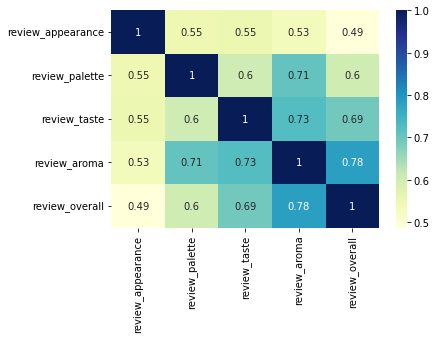

In [230]:
# prints data that will be plotted
print(imp_rev_df.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(imp_rev_df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

## 4. Top 3 Beers to be recommended
Steps
1. Select Beer name along with all review columns
2. Count the reviews for each Beer
3. Take Beers who has more than 1000 reviews in total
4. Find Average of each review and group by Beer
5. Calculate Review total by adding the average of all the reviews
6. Sort Desending by Review total find and Cap it 3

#### Conclusion - Founders KBS (Kentucky Breakfast Stout), Trappistes Rochefort 10	and Founders Breakfast Stout are the top Beers to be recommended accoriding to the reviews

In [226]:
top_beer_recom_df = beer_df.copy()
top_beer_recom_df= top_beer_recom_df[['beer_name','review_appearance','review_palette',
                        'review_taste','review_aroma','review_overall']]

In [227]:
top_beer_review_df = top_beer_recom_df.value_counts(['beer_name']).reset_index(name='review_counts')
top_beer_review_df = top_beer_review_df[top_beer_review_df['review_counts']>1000]
top_beer_recom_df = pd.merge(top_beer_recom_df, top_beer_review_df[['beer_name','review_counts']], on=['beer_name'],how='inner')
top_beer_recom_df = top_beer_recom_df.groupby('beer_name').agg({'review_appearance':'mean','review_palette':'mean',
                                                                'review_taste':'mean','review_aroma':'mean',
                                                                 'review_overall':'mean'}).reset_index()

top_beer_recom_df['review_total']= top_beer_recom_df.iloc[:,1:6].sum(axis=1)
top_3_beer_recom_df = top_beer_recom_df.sort_values('review_total',ascending=False).reset_index(drop=True).head(3)
top_3_beer_recom_df

,beer_name,review_appearance,review_palette,review_taste,review_aroma,review_overall,review_total
0,Founders KBS (Kentucky Breakfast Stout),4.377070,4.570393,4.479814,4.626294,4.397516,22.451087
1,Trappistes Rochefort 10,4.344931,4.418664,4.430876,4.543548,4.339401,22.077419
2,Founders Breakfast Stout,4.364508,4.412070,4.387890,4.501199,4.354516,22.020184


## 5. Best Beer Style According to the Reviews given
Steps:
1. Remove all special characters from the Review text columm and create a clean text
2. Using textblob calculate the sentiment of Review - by polarity
3. Assign the review by Positive/Negative/Neutral by polarity value
4. Find the top Beerstyle by counting highest Positive feedbacks

#### Conclusion - American IPA	is the Beer Style as it has received maximum Positive feedbacks

In [272]:
review_data_df = beer_df.copy()
# Define a function to clean the text
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    return text

# Cleaning the text in the review column
review_data_df['cleaned_reviews'] = review_data_df['review_text'].apply(clean)

In [273]:
from textblob import TextBlob
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [275]:
review_data_df = pd.DataFrame(review_data_df[['beer_style','review_overall','cleaned_reviews']])
review_data_df['Polarity'] = review_data_df['cleaned_reviews'].apply(getPolarity) 
review_data_df['Analysis'] = review_data_df['Polarity'].apply(analysis)
review_data_df

,beer_style,review_overall,cleaned_reviews,Polarity,Analysis
0,Hefeweizen,1.5,A lot of foam But a lot In the smell some ba...,-0.090909,Negative
1,English Strong Ale,3.0,Dark red color light beige foam average In ...,0.147436,Positive
2,Foreign / Export Stout,3.0,Almost totally black Beige foam quite compac...,0.338333,Positive
3,German Pilsener,3.0,Golden yellow color White compact foam quit...,0.362745,Positive
4,American Double / Imperial IPA,4.0,According to the website the style for the Ca...,0.156868,Positive
...,...,...,...,...,...
528865,Munich Dunkel Lager,4.0,A pours a reddish amber that looks very nice l...,0.131364,Positive
528866,Munich Dunkel Lager,3.0,I don t really have anything special to say ab...,0.182814,Positive
528867,Munich Dunkel Lager,4.5,Had this on tap at Vreny s Beirgarten A Came...,0.110212,Positive
528868,Munich Dunkel Lager,4.0,Purchased at Market Cross Pub in carlisle PA ...,0.282692,Positive


In [267]:
best_beer_style_df = review_data_df[review_data_df['Analysis']=='Positive']
best_beer_style_df = best_beer_style_df.groupby('beer_style').agg({'Analysis':'count'}).reset_index()
best_beer_style_df = best_beer_style_df.sort_values('Analysis',ascending=False).reset_index(drop=True).head(5)
best_beer_style_df.rename(columns={'Analysis': 'Positive_Counts'}, inplace=True)
best_beer_style_df

,beer_style,Positive_Counts
0,American IPA,42083
1,American Double / Imperial IPA,25348
2,American Double / Imperial Stout,22254
3,American Pale Ale (APA),19576
4,American Amber / Red Ale,17926


## 6. Compare Overall Review vs Written Review for Beer Styles
Steps:
1. Create a Dataframe with Beer style, Analysis segment of Polarity value (Positive/Negative)
2. Create a function to find analysis on Reviews overall and segment them in (Positive/Negative)
3. Check the percentage of Review from text vs Reviews from Polarity scores

#### Conclusion - Almost 94-92% values are postive for overall Beer style and 5-7% are Negatives

In [293]:
compare_review_df = review_data_df.copy()
compare_review_df = pd.DataFrame(compare_review_df[['beer_style','review_overall','Polarity','Analysis']])

In [294]:
# function to analyze the reviews
def analysis_review(score):
    if score <= 2.5:
        return 'Negative'
    else:
        return 'Positive'

In [295]:
compare_review_df['Analysis_review'] = compare_review_df['review_overall'].apply(analysis_review)
compare_review_df

,beer_style,review_overall,Polarity,Analysis,Analysis_review
0,Hefeweizen,1.5,-0.090909,Negative,Negative
1,English Strong Ale,3.0,0.147436,Positive,Positive
2,Foreign / Export Stout,3.0,0.338333,Positive,Positive
3,German Pilsener,3.0,0.362745,Positive,Positive
4,American Double / Imperial IPA,4.0,0.156868,Positive,Positive
...,...,...,...,...,...
528865,Munich Dunkel Lager,4.0,0.131364,Positive,Positive
528866,Munich Dunkel Lager,3.0,0.182814,Positive,Positive
528867,Munich Dunkel Lager,4.5,0.110212,Positive,Positive
528868,Munich Dunkel Lager,4.0,0.282692,Positive,Positive


In [291]:
compare_review_df['Analysis'].value_counts(normalize=True) * 100

Positive    94.779624
Negative     5.150037
Neutral      0.070339
Name: Analysis, dtype: float64

In [292]:
compare_review_df['Analysis_review'].value_counts(normalize=True) * 100

Positive    92.859871
Negative     7.140129
Name: Analysis_review, dtype: float64

# Appendix

Tried to remvove some outliers from the data and plot them

In [296]:
#Reading the input dataset
beer_df = pd.read_csv('BeerDataScienceProject/BeerDataScienceProject.csv',encoding='unicode_escape')
beer_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


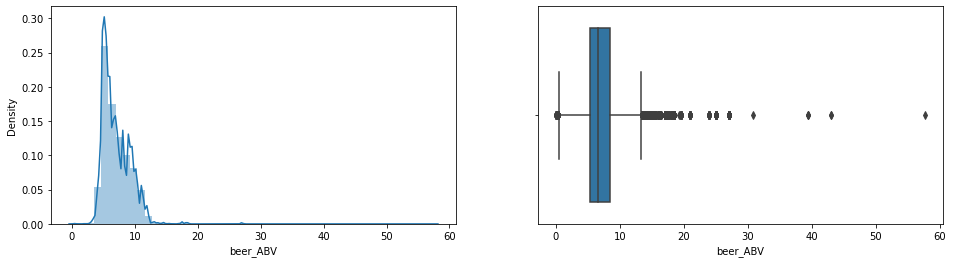

In [297]:
#Remove the outliers using IQR and then find the top 3 beers using ABV content
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(beer_df['beer_ABV'])
plt.subplot(1,2,2)
sns.boxplot(beer_df['beer_ABV'])
plt.show()

In [298]:
#checking outliers
#Finding IQR
percentile25 = beer_df['beer_ABV'].quantile(0.25)
percentile75 = beer_df['beer_ABV'].quantile(0.75)

#IQR
iqr = percentile75 - percentile25
#Finding upper and lower limit

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers
beer_df[beer_df['beer_ABV'] > upper_limit]
beer_df[beer_df['beer_ABV'] < lower_limit]

#Trimming
new_df = beer_df[beer_df['beer_ABV'] < upper_limit]
new_df.shape

(505584, 13)

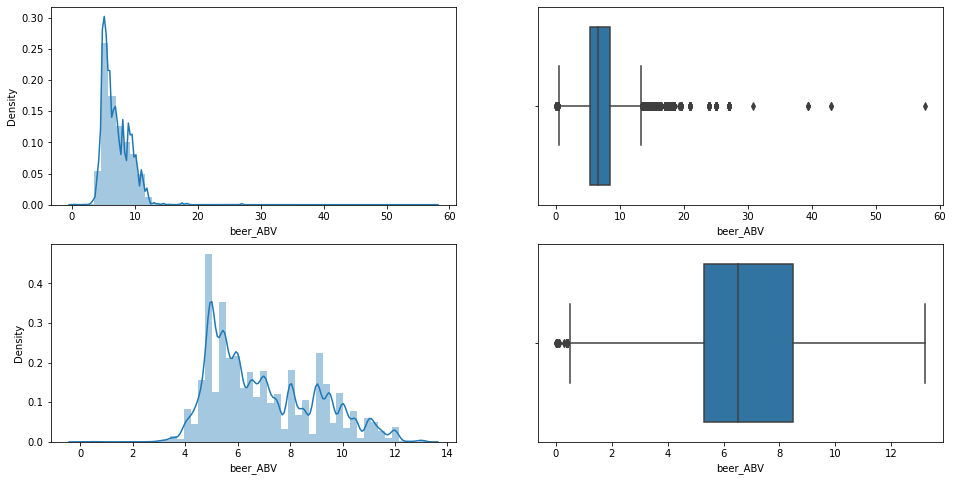

In [299]:
#Compare the plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(beer_df['beer_ABV'])
plt.subplot(2,2,2)
sns.boxplot(beer_df['beer_ABV'])
plt.subplot(2,2,3)
sns.distplot(new_df['beer_ABV'])
plt.subplot(2,2,4)
sns.boxplot(new_df['beer_ABV'])
plt.show()

In [301]:
#Capping
new_df_cap = beer_df.copy()
new_df_cap['beer_ABV'] = np.where(
    new_df_cap['beer_ABV'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['beer_ABV'] < lower_limit,
        lower_limit,
        new_df_cap['beer_ABV']
    )
)

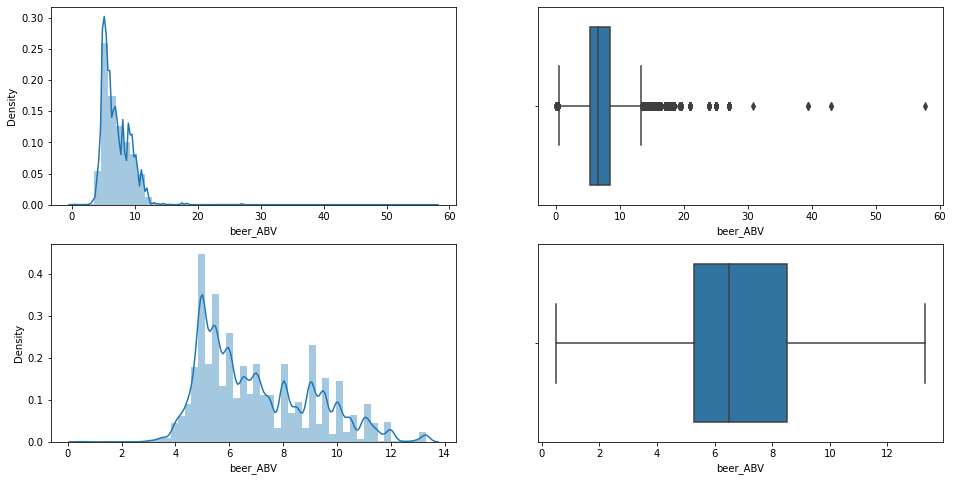

In [302]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(beer_df['beer_ABV'])
plt.subplot(2,2,2)
sns.boxplot(beer_df['beer_ABV'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['beer_ABV'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['beer_ABV'])
plt.show()